In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### **Logarithmic scale.**

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

Text(0.5, 1.0, 'Logarithmic scale (y)')

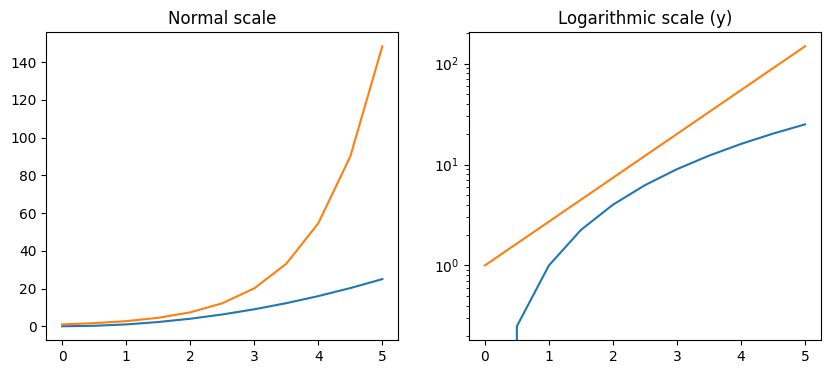

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

x = np.linspace(0, 5, 11)

axes[0].plot(x, x ** 2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x ** 2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)")


### **Placement of ticks and custom tick labels.**

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

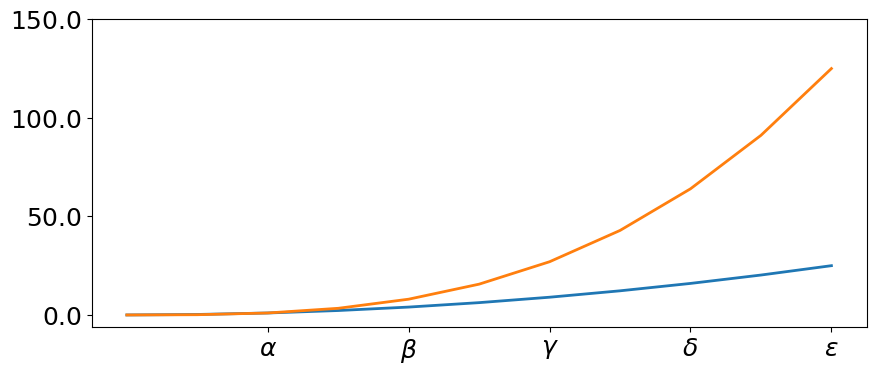

In [5]:
fig, ax = plt.subplots(figsize = (10, 4))

x = np.linspace(0, 5, 11)

ax.plot(x, x ** 2, x, x ** 3, lw = 2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize = 18);

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

### **Scientific notation.**

With large numbers on axes, it is often better use scientific notation:

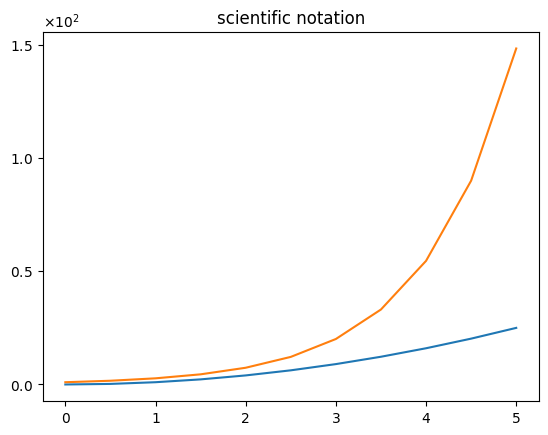

In [6]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x ** 2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker # Import the ticker module. This module provides tools for formatting objects on graphs.

formatter = ticker.ScalarFormatter(useMathText = True) # Read below for more details

formatter.set_scientific(True) 
"""
Set scientific notation. Scientific format is used to represent large or small numbers as  a rational number with 
an exponent index.
"""

formatter.set_powerlimits((-1, 1))
"""
The `set_powerlimits((lmin, lmax))` method sets the limits for the use of the exponential format. Specifically,  if `lmin` 
and `lmax` are integers, then the exponent will be used if the number is greater than `10^lmax` or less than `10^lmin`.

In the case of `formatter.set_powerlimits((-1, 1))`, the `lmin` and `lmax` values are both set to `-1` and `1`. This means, 
if the value on the y-axis of the graph is greater than `10^1 (i.e. 10)` or less than `10^-1 (i.e. 0.1)`, the value will be 
expressed as an exponent.
"""

ax.yaxis.set_major_formatter(formatter) # Set the major formatter for the y-axis

In [7]:
help(ticker.ScalarFormatter)

Help on class ScalarFormatter in module matplotlib.ticker:

class ScalarFormatter(Formatter)
 |  ScalarFormatter(useOffset=None, useMathText=None, useLocale=None)
 |  
 |  Format tick values as a number.
 |  
 |  Parameters
 |  ----------
 |  useOffset : bool or float, default: :rc:`axes.formatter.useoffset`
 |      Whether to use offset notation. See `.set_useOffset`.
 |  useMathText : bool, default: :rc:`axes.formatter.use_mathtext`
 |      Whether to use fancy math formatting. See `.set_useMathText`.
 |  useLocale : bool, default: :rc:`axes.formatter.use_locale`.
 |      Whether to use locale settings for decimal sign and positive sign.
 |      See `.set_useLocale`.
 |  
 |  Notes
 |  -----
 |  In addition to the parameters above, the formatting of scientific vs.
 |  floating point representation can be configured via `.set_scientific`
 |  and `.set_powerlimits`).
 |  
 |  **Offset notation and scientific notation**
 |  
 |  Offset notation and scientific notation look quite similar

### **Axis number and axis label spacing.**

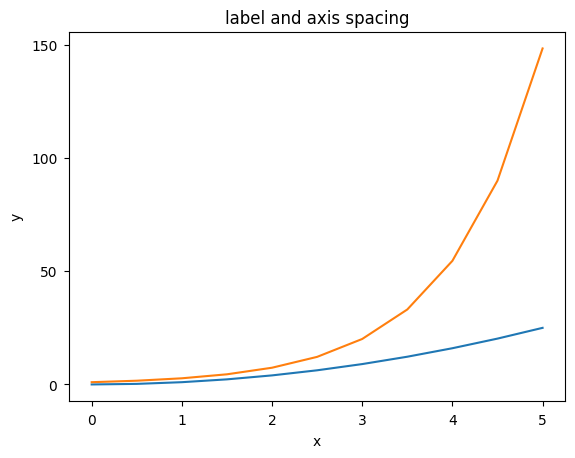

In [8]:
# distance between x and y axis and the numbers on the axes
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x ** 2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

### **Axis position adjustments.**

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

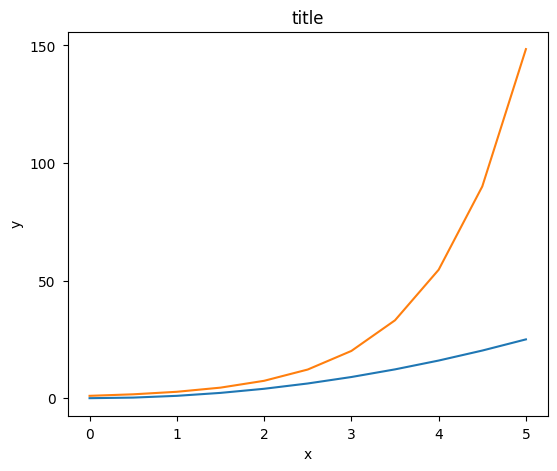

In [9]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x ** 2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left = 0.15, right = .9, bottom = 0.1, top = 0.9);

### **Axis grid.**

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

In [10]:
help(plt.grid)

Help on function grid in module matplotlib.pyplot:

grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'
    Configure the grid lines.
    
    Parameters
    ----------
    visible : bool or None, optional
        Whether to show the grid lines.  If any *kwargs* are supplied, it
        is assumed you want the grid on and *visible* will be set to True.
    
        If *visible* is *None* and there are no *kwargs*, this toggles the
        visibility of the lines.
    
    which : {'major', 'minor', 'both'}, optional
        The grid lines to apply the changes on.
    
    axis : {'both', 'x', 'y'}, optional
        The axis to apply the changes on.
    
    **kwargs : `~matplotlib.lines.Line2D` properties
        Define the line properties of the grid, e.g.::
    
            grid(color='r', linestyle='-', linewidth=2)
    
        Valid keyword arguments are:
    
        Properties:


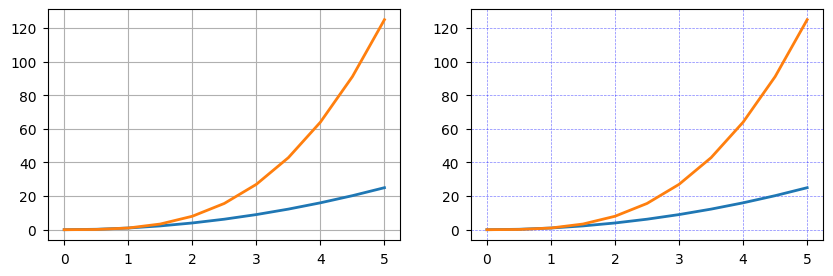

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (10, 3))

# default grid appearance
axes[0].plot(x, x ** 2, x, x ** 3, lw = 2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x ** 2, x, x ** 3, lw = 2)
axes[1].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5) # alpha is the transparency of the grid lines

### **Axis spines.**

We can also change the properties of axis spines:

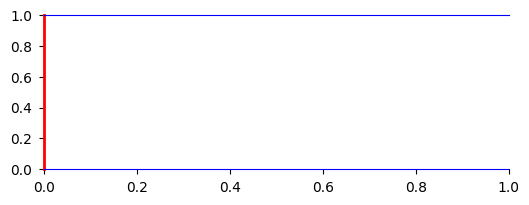

In [12]:
fig, ax = plt.subplots(figsize = (6, 2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### **Twin axes.**

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

+ `twinx()`: Creates a new axis that shares the `x` axis with the original axis. This means that the x-axis of both axes will overlap, but the y-axis will be independent. This is useful when you want to plot two graphs on the same drawing but with different `y` values.

+ `twiny()`: Creates a new axis that shares the `y` axis with the original axis. This means that the y-axis of both axes will overlap, but the x-axis will be independent. This is useful when you want to plot two graphs on the same drawing but with different `x` values.

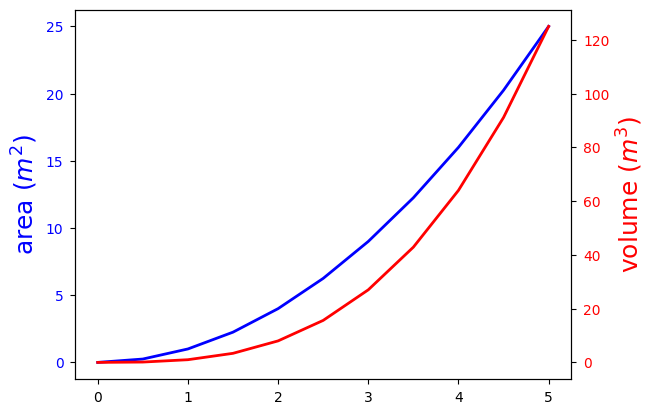

In [13]:
fig, ax1 = plt.subplots()

ax1.plot(x, x ** 2, lw = 2, color = "blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize = 18, color = "blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x ** 3, lw = 2, color = "red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize = 18, color = "red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### **Axes where x and y is zero.**

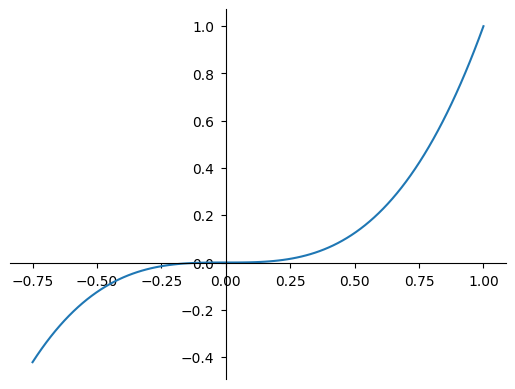

In [14]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom') # supported values are 'top', 'bottom', 'both', 'default', 'none'
ax.spines['bottom'].set_position(('data', 0)) # set position of x spine to x = 0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))   # set position of y spine to y = 0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx ** 3);

### **Other 2D plot styles.**

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [15]:
n = np.array([0, 1, 2, 3, 4, 5])

Text(0.5, 1.0, 'fill_between')

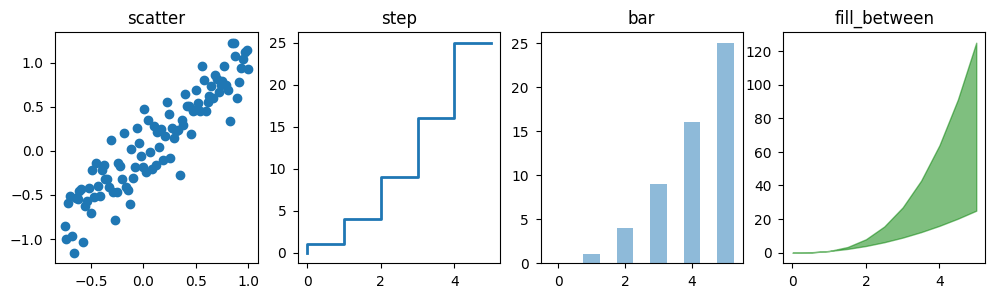

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25 * np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n ** 2, lw = 2)
axes[1].set_title("step")

axes[2].bar(n, n ** 2, align = "center", width = 0.5, alpha = 0.5) # align: {'center', 'edge'}, optional, default: 'center'
axes[2].set_title("bar")

axes[3].fill_between(x, x ** 2, x ** 3, color = "green", alpha = 0.5)
axes[3].set_title("fill_between")

In [17]:
help(plt.fill_between)

Help on function fill_between in module matplotlib.pyplot:

fill_between(x: 'ArrayLike', y1: 'ArrayLike | float', y2: 'ArrayLike | float' = 0, where: 'Sequence[bool] | None' = None, interpolate: 'bool' = False, step: "Literal['pre', 'post', 'mid'] | None" = None, *, data=None, **kwargs) -> 'PolyCollection'
    Fill the area between two horizontal curves.
    
    The curves are defined by the points (*x*, *y1*) and (*x*,
    *y2*).  This creates one or multiple polygons describing the filled
    area.
    
    You may exclude some horizontal sections from filling using *where*.
    
    By default, the edges connect the given points directly.  Use *step*
    if the filling should be a step function, i.e. constant in between
    *x*.
    
    Parameters
    ----------
    x : array (length N)
        The x coordinates of the nodes defining the curves.
    
    y1 : array (length N) or scalar
        The y coordinates of the nodes defining the first curve.
    
    y2 : array (length N) 

In [18]:
help(plt.step)

Help on function step in module matplotlib.pyplot:

step(x: 'ArrayLike', y: 'ArrayLike', *args, where: "Literal['pre', 'post', 'mid']" = 'pre', data=None, **kwargs) -> 'list[Line2D]'
    Make a step plot.
    
    Call signatures::
    
        step(x, y, [fmt], *, data=None, where='pre', **kwargs)
        step(x, y, [fmt], x2, y2, [fmt2], ..., *, where='pre', **kwargs)
    
    This is just a thin wrapper around `.plot` which changes some
    formatting options. Most of the concepts and parameters of plot can be
    used here as well.
    
    .. note::
    
        This method uses a standard plot with a step drawstyle: The *x*
        values are the reference positions and steps extend left/right/both
        directions depending on *where*.
    
        For the common case where you know the values and edges of the
        steps, use `~.Axes.stairs` instead.
    
    Parameters
    ----------
    x : array-like
        1D sequence of x positions. It is assumed, but not checked, tha

### **Text annotation.**

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

In [22]:
help(plt.text)

Help on function text in module matplotlib.pyplot:

text(x: 'float', y: 'float', s: 'str', fontdict: 'dict[str, Any] | None' = None, **kwargs) -> 'Text'
    Add text to the Axes.
    
    Add the text *s* to the Axes at location *x*, *y* in data coordinates,
    with a default ``horizontalalignment`` on the ``left`` and
    ``verticalalignment`` at the ``baseline``. See
    :doc:`/gallery/text_labels_and_annotations/text_alignment`.
    
    Parameters
    ----------
    x, y : float
        The position to place the text. By default, this is in data
        coordinates. The coordinate system can be changed using the
        *transform* parameter.
    
    s : str
        The text.
    
    fontdict : dict, default: None
    
        .. admonition:: Discouraged
    
           The use of *fontdict* is discouraged. Parameters should be passed as
           individual keyword arguments or using dictionary-unpacking
           ``text(..., **fontdict)``.
    
        A dictionary to overri

Text(0.65, 0.1, '$y = x^3$')

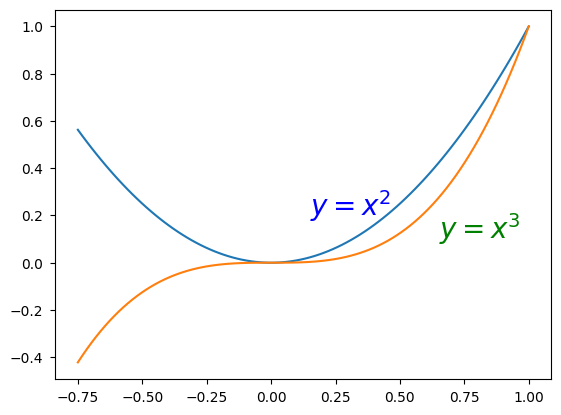

In [23]:
fig, ax = plt.subplots()

ax.plot(xx, xx ** 2, xx, xx ** 3)

ax.text(x = 0.15, y =  0.2, s =  r"$y = x^2$", fontsize = 20, color = "blue") # x and y are the coordinates of the text
ax.text(0.65, 0.1, r"$y = x^3$", fontsize = 20, color = "green")

### **`subplot2grid` and `gridspec` for figures with multiple subplots.**

+ `subplot2grid`

In [24]:
help(plt.subplot2grid)

Help on function subplot2grid in module matplotlib.pyplot:

subplot2grid(shape: 'tuple[int, int]', loc: 'tuple[int, int]', rowspan: 'int' = 1, colspan: 'int' = 1, fig: 'Figure | None' = None, **kwargs) -> 'matplotlib.axes.Axes'
    Create a subplot at a specific location inside a regular grid.
    
    Parameters
    ----------
    shape : (int, int)
        Number of rows and of columns of the grid in which to place axis.
    loc : (int, int)
        Row number and column number of the axis location within the grid.
    rowspan : int, default: 1
        Number of rows for the axis to span downwards.
    colspan : int, default: 1
        Number of columns for the axis to span to the right.
    fig : `.Figure`, optional
        Figure to place the subplot in. Defaults to the current figure.
    **kwargs
        Additional keyword arguments are handed to `~.Figure.add_subplot`.
    
    Returns
    -------
    `~.axes.Axes`
    
        The Axes of the subplot. The returned Axes can actu

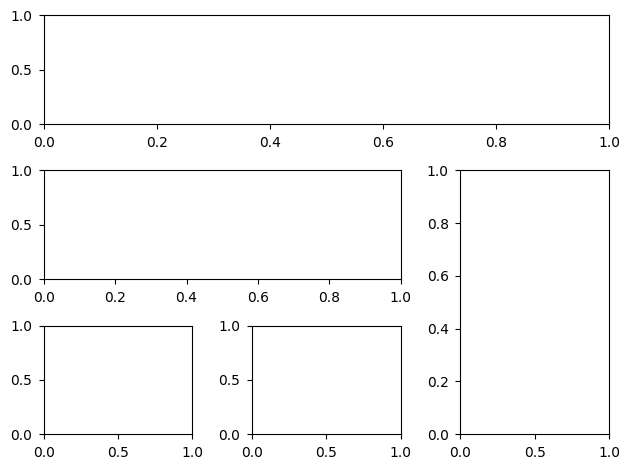

In [35]:
fig = plt.figure()
ax1 = plt.subplot2grid(shape = (3, 3), loc = (0, 0), colspan = 3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan = 2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan = 2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))
fig.tight_layout()

+ `GridSpec`

In [38]:
help(plt.GridSpec)

Help on class GridSpec in module matplotlib.gridspec:

class GridSpec(GridSpecBase)
 |  GridSpec(nrows, ncols, figure=None, left=None, bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, height_ratios=None)
 |  
 |  A grid layout to place subplots within a figure.
 |  
 |  The location of the grid cells is determined in a similar way to
 |  `~.figure.SubplotParams` using *left*, *right*, *top*, *bottom*, *wspace*
 |  and *hspace*.
 |  
 |  Indexing a GridSpec instance returns a `.SubplotSpec`.
 |  
 |  Method resolution order:
 |      GridSpec
 |      GridSpecBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, nrows, ncols, figure=None, left=None, bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, height_ratios=None)
 |      Parameters
 |      ----------
 |      nrows, ncols : int
 |          The number of rows and columns of the grid.
 |      
 |      figure : `.Figure`, optional
 |          Only 

In [39]:
import matplotlib.gridspec as gridspec

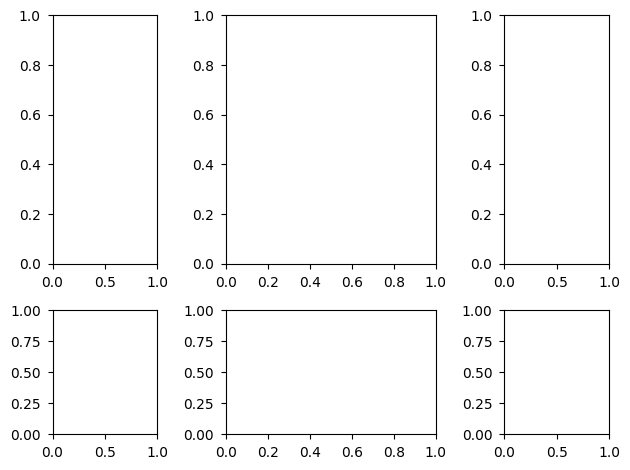

In [43]:
fig = plt.figure()

gs = gridspec.GridSpec(nrows = 2, ncols = 3, height_ratios=[2, 1], width_ratios=[1, 2, 1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

### **Colormap and contour figures.**

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [44]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2 * phi_p)

In [64]:
phi_m = np.linspace(0, 2 * np.pi, 100)
phi_p = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y)

+ `pcolor`

In [50]:
help(plt.pcolor)

Help on function pcolor in module matplotlib.pyplot:

pcolor(*args: 'ArrayLike', shading: "Literal['flat', 'nearest', 'auto'] | None" = None, alpha: 'float | None' = None, norm: 'str | Normalize | None' = None, cmap: 'str | Colormap | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, data=None, **kwargs) -> 'Collection'
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolor([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. hint::
    
        ``pcolor()`` can be very slow for large arrays. In most
        cases you should use the similar but much faster
        `~.Axes.pcolormesh` instead. See
        :ref:`Differences between pcolor() and pcolormesh()
        <differences-pcolor-pcolormesh>` for a discussion of the
        differences.
    
    Parameters
    ----------
    C : 2D array-like
        The color-mapped values.  Color-mapping is con

In [53]:
help(plt.colorbar)

Help on function colorbar in module matplotlib.pyplot:

colorbar(mappable: 'ScalarMappable | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'
    Add a colorbar to a plot.
    
    Parameters
    ----------
    mappable
        The `matplotlib.cm.ScalarMappable` (i.e., `.AxesImage`,
        `.ContourSet`, etc.) described by this colorbar.  This argument is
        mandatory for the `.Figure.colorbar` method but optional for the
        `.pyplot.colorbar` function, which sets the default to the current
        image.
    
        Note that one can create a `.ScalarMappable` "on-the-fly" to
        generate colorbars not attached to a previously drawn artist, e.g.
        ::
    
            fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    
    cax : `~matplotlib.axes.Axes`, optional
        Axes into which the colorbar will be drawn.  If `None`, then a new
        A

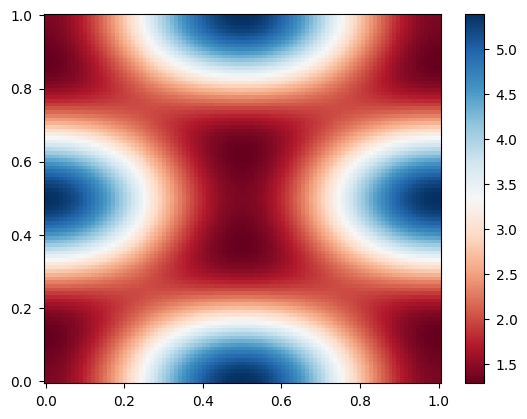

In [73]:
fig, ax = plt.subplots()

p = ax.pcolor(X / (2 * np.pi), Y / (2 * np.pi), Z, cmap = plt.cm.RdBu, vmin = abs(Z).min(), vmax = abs(Z).max())
cb = fig.colorbar(p, ax = ax)

+ `imshow`

In [76]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
  

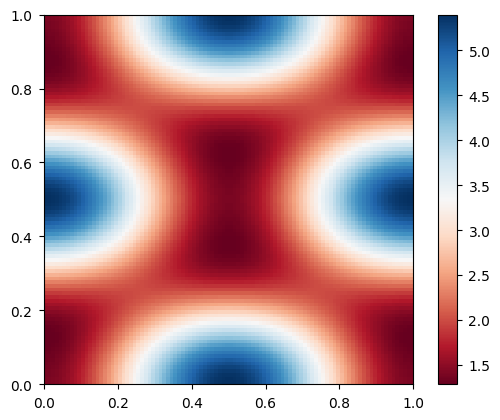

In [85]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap = plt.cm.RdBu, vmin = abs(Z).min(), vmax = abs(Z).max(), extent = [0, 1, 0, 1])

cb = fig.colorbar(im, ax = ax)

+ `contour`

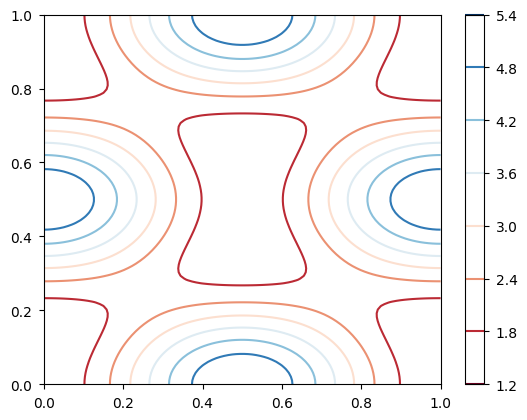

In [88]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap = plt.cm.RdBu, vmin = abs(Z).min(), vmax = abs(Z).max(), extent = [0, 1, 0, 1])

cb = fig.colorbar(cnt, ax = ax)

### **3D figures.**

To use 3D graphics in `matplotlib`, we first need to create an instance of the `Axes3D` class. 3D axes can be added to a `matplotlib` figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection = '3d'` keyword argument to the `add_axes` or `add_subplot` methods.

In [89]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

+ Surface plots:

Its basic syntax is as follows: `plot_surface(X, Y, Z, *args, **kwargs)`

In there:

+ `X, Y, Z`: are 2D arrays or lists of 2D arrays. X, Y define coordinates on the plane, while Z defines height.

+ `*args`: are other optional arguments.

+ `**kwargs`: are other optional keyword arguments.

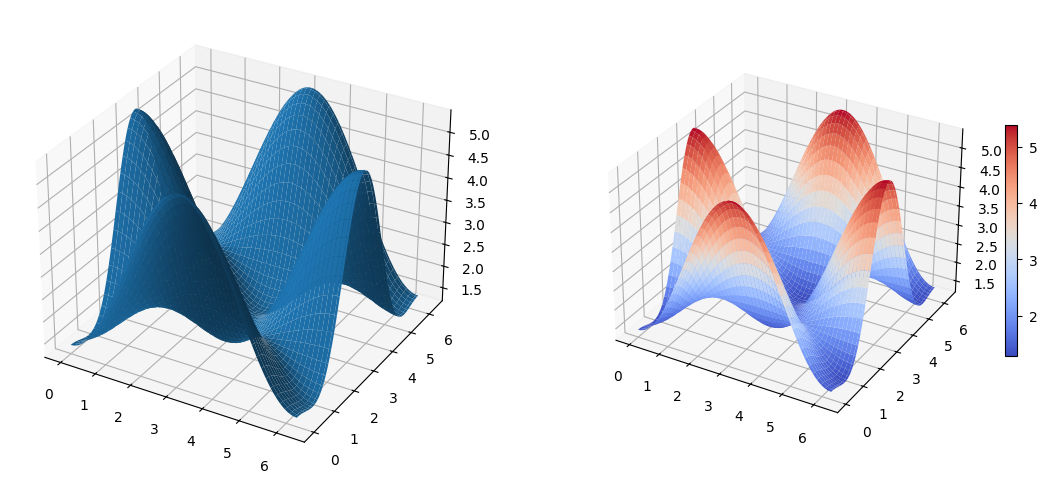

In [109]:
fig = plt.figure(figsize = (14, 6))

# `ax` is a 3D-aware axis instance because of the `projection = '3d'` keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection = '3d')

p = ax.plot_surface(X, Y, Z)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection = '3d')
p = ax.plot_surface(X, Y, Z, cmap = plt.cm.coolwarm)
cb = fig.colorbar(p, shrink=0.5)

+ Wire-frame plot:

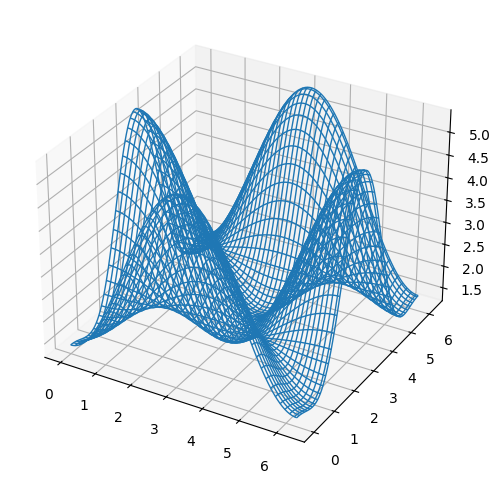

In [117]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(1, 1, 1, projection = '3d')

p = ax.plot_wireframe(X, Y, Z, lw = 1)

+ Coutour plots with projections:

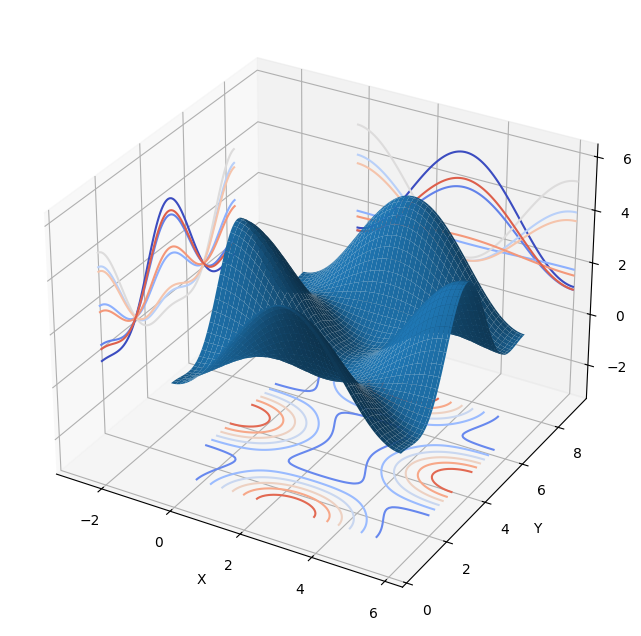

In [145]:
fig = plt.figure(figsize = (10, 8))

ax = fig.add_subplot(1, 1, 1, projection = '3d')

ax.plot_surface(X, Y, Z)
cset = ax.contour(X, Y, Z, zdir = 'x', offset = -2, cmap = plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir = 'y', offset = 9, cmap = plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir = 'z', offset = -2, cmap = plt.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2 * np.pi);
ax.set_ylim3d(0, 3 * np.pi);
ax.set_zlim3d(-np.pi, 2 * np.pi);
ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_zlabel('Z');
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5
ax.zaxis.labelpad = 5

`zdir` is a parameter that determines the direction in which the contour line will be drawn in 3D space. It can take one of three values: 'x', 'y' or 'z'. When you set zdir to 'x', 'y' or 'z', the contour line will be drawn parallel to the corresponding axis.

`offset` is a parameter that determines the position of the contour line on the corresponding axis. It allows you to move the contour line along that axis.